In [52]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset


plt.style.use('tp1.mplstyle')

In [53]:
A = 1
F = 1
T = 1 / F

# Tren de pulsos
x = lambda t: A * np.sign(np.sin(2 * np.pi * F * t))

# Diente de sierra
y = lambda t: A * (t * F - np.floor(0.5 + t * F))

t = np.linspace(-1, 1, 1000)


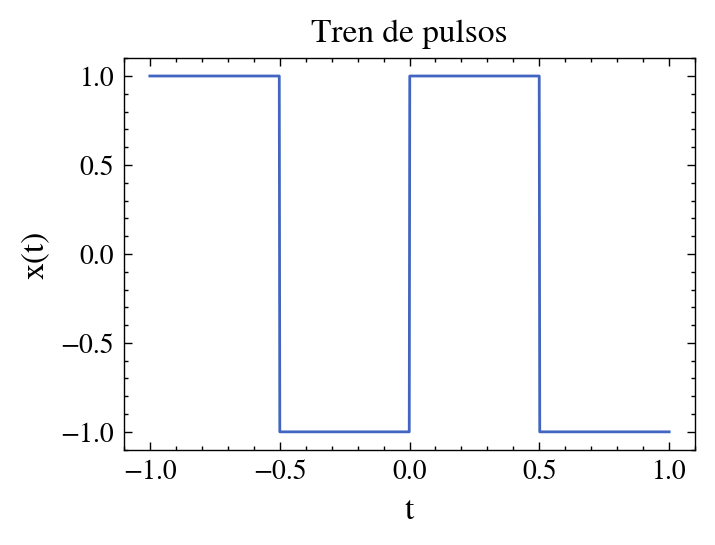

In [54]:
# Plot Tren de pulsos

plt.plot(t, x(t))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Tren de pulsos')
plt.show()

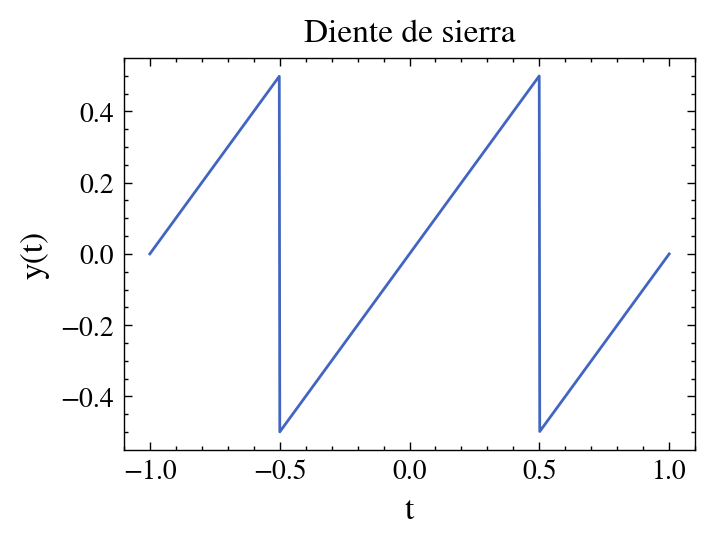

In [55]:
# Plot diente de sierra

plt.plot(t, y(t))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Diente de sierra') 
plt.show()

In [56]:
def trigFourierSeries(an: callable, bn: callable, a0: float, T: float, N: int) -> callable:
    """
    Returns the trigonometric Fourier series of the function given
    the coefficients an and bn and the number of terms N.
    :param an: function that returns the coefficient an
    :param bn: function that returns the coefficient bn
    :param a0: constant term
    :param T: period of the function
    :param N: number of terms
    """
    def f(t: np.ndarray) -> np.ndarray:
        return a0 / 2 + sum(an(n) * np.cos(2 * np.pi * n * t / T) + bn(n) * np.sin(2 * np.pi * n * t / T) for n in range(1, N + 1))
    return f

def expFourierSeries(cn: callable, c0: float, T: float, N: int) -> callable:
    """
    Returns the exponential Fourier series of the function given
    the coefficient cn and the number of terms N.
    :param cn: function that returns the coefficient cn
    :param c0: constant term
    :param T: period of the function
    :param N: number of terms
    """
    def f(t: np.ndarray) -> np.ndarray:
        return c0 + sum(cn(n) * np.exp(2 * np.pi * 1j * n * t / T) for n in range(-N, N + 1) if n != 0)
    return f



In [57]:
# Coeficientes de Tren de pulsos
a01 = 0
an1 = lambda n: 0
bn1 = lambda n: (2*A / (np.pi*n)) * (1 - (-1)**n)
c01 = 0
cn1 = lambda n: -1j * (A / (np.pi * n)) * (1 - (-1)**n)

Realizamos las aproximaciones pero para 10, 30 y 50 armónicos

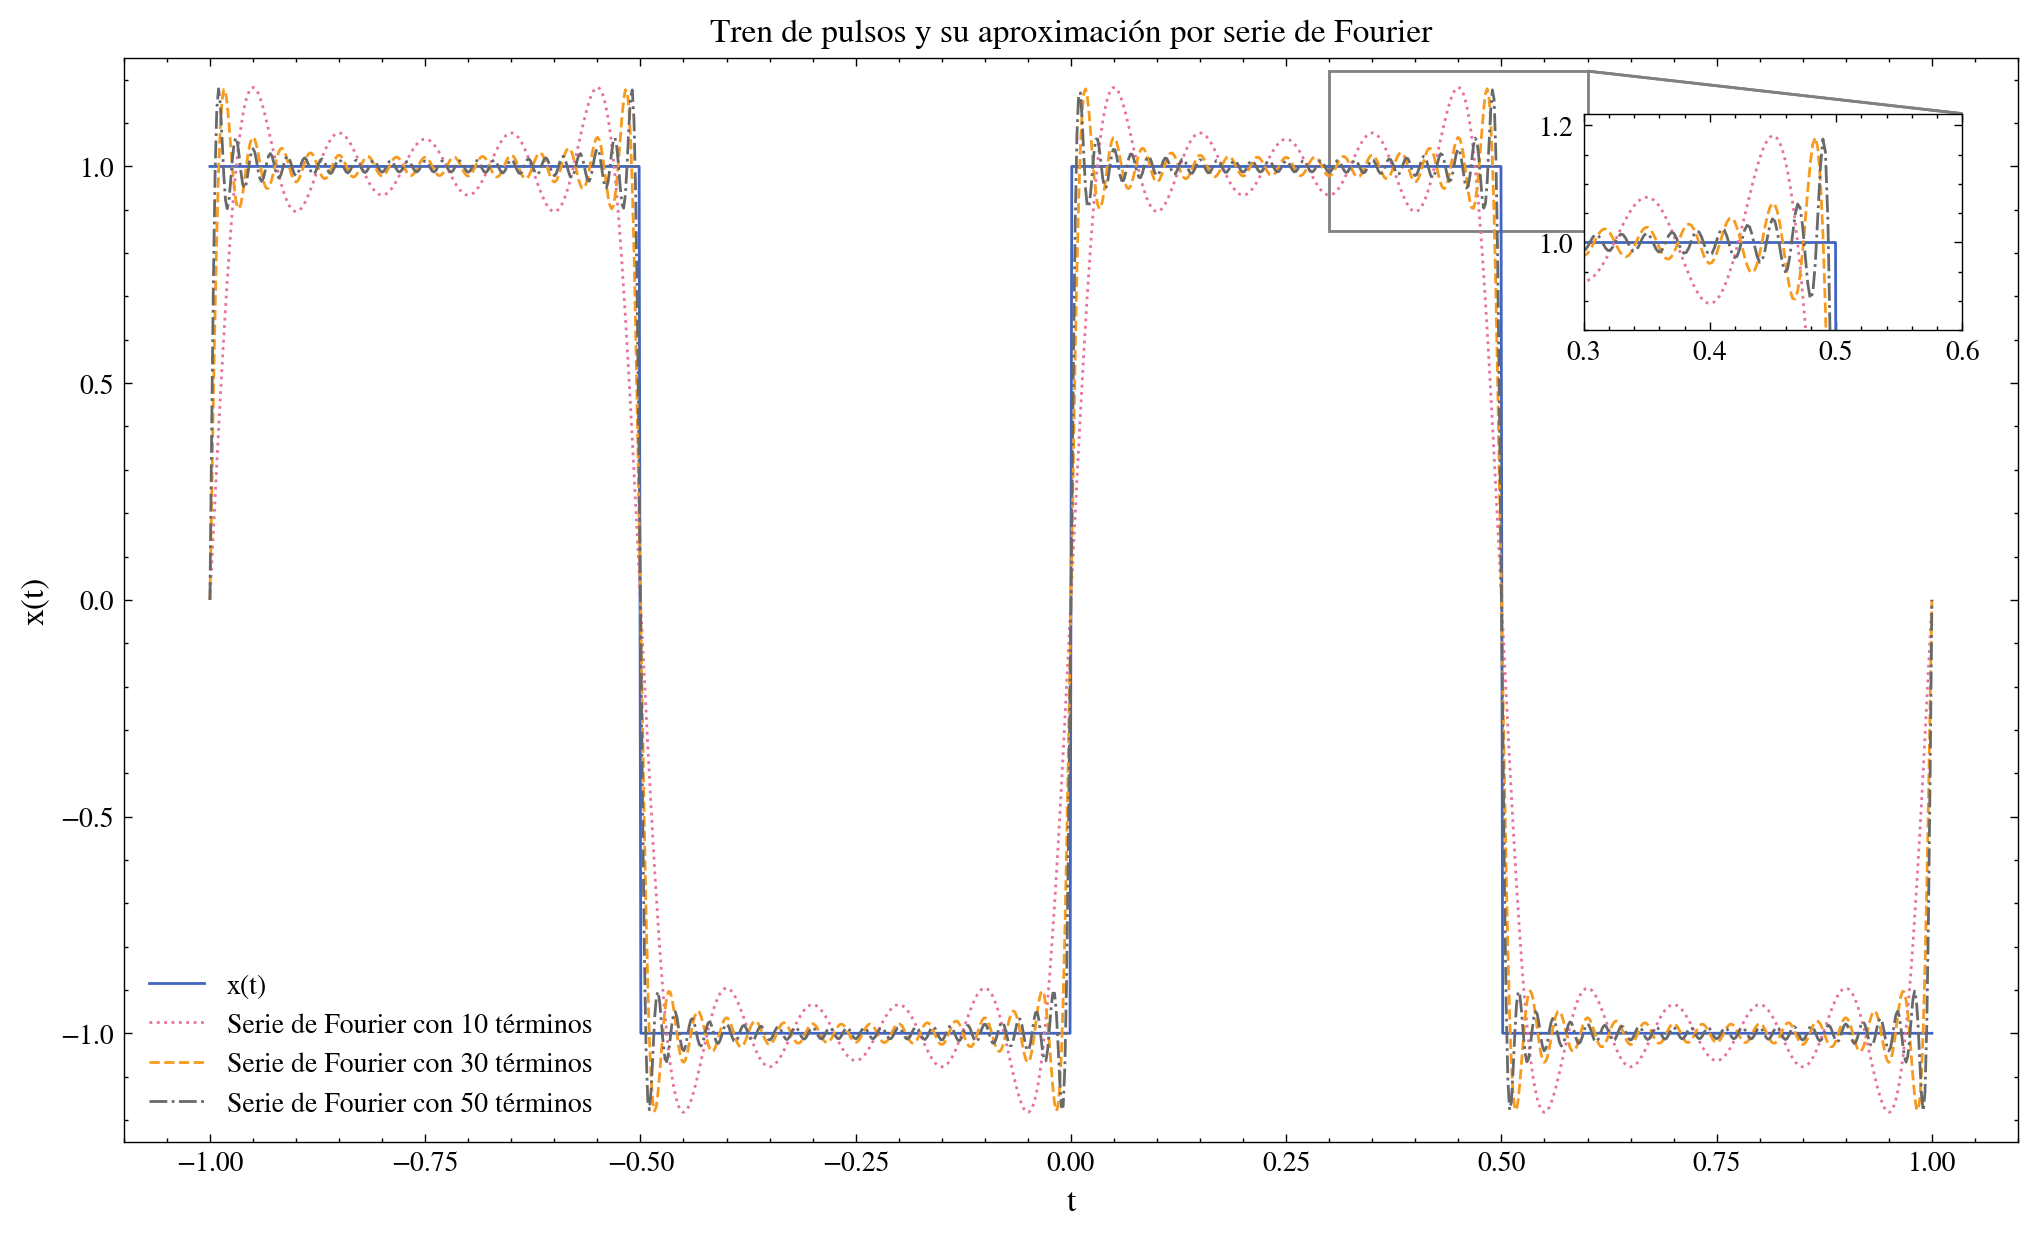

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot de la función Tren de pulsos y las aproximaciones 
ax.plot(t, x(t), label='x(t)')
ax.plot(t, trigFourierSeries(an1, bn1, a01, T, 10)(t), label='Serie de Fourier con 10 términos')
ax.plot(t, trigFourierSeries(an1, bn1, a01, T, 30)(t), label='Serie de Fourier con 30 términos')
ax.plot(t, trigFourierSeries(an1, bn1, a01, T, 50)(t), label='Serie de Fourier con 50 términos')

ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_title('Tren de pulsos y su aproximación por serie de Fourier')
ax.legend(loc='lower left')

original_xlim = ax.get_xlim()
original_ylim = ax.get_ylim()

ax.set_xlim(original_xlim)
ax.set_ylim((-1.25, 1.25))

axins = inset_axes(ax, width="20%", height="20%", loc='upper right', borderpad=2)
axins.plot(t, x(t))
axins.plot(t, trigFourierSeries(an1, bn1, a01, T, 10)(t))
axins.plot(t, trigFourierSeries(an1, bn1, a01, T, 30)(t))
axins.plot(t, trigFourierSeries(an1, bn1, a01, T, 50)(t))

axins.set_xlim(0.30, 0.60)
axins.set_ylim(0.85, 1.22)

mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.5")

plt.show()

In [59]:
# Coeficientes de diente de sierra
a02 = 0
an2 = lambda n: 0
bn2 = lambda n: -A * ((-1)**n / (np.pi * n))
c02 = 0
cn2 = lambda n: 1j * (A / 2) * ((-1) ** n / (np.pi * n))

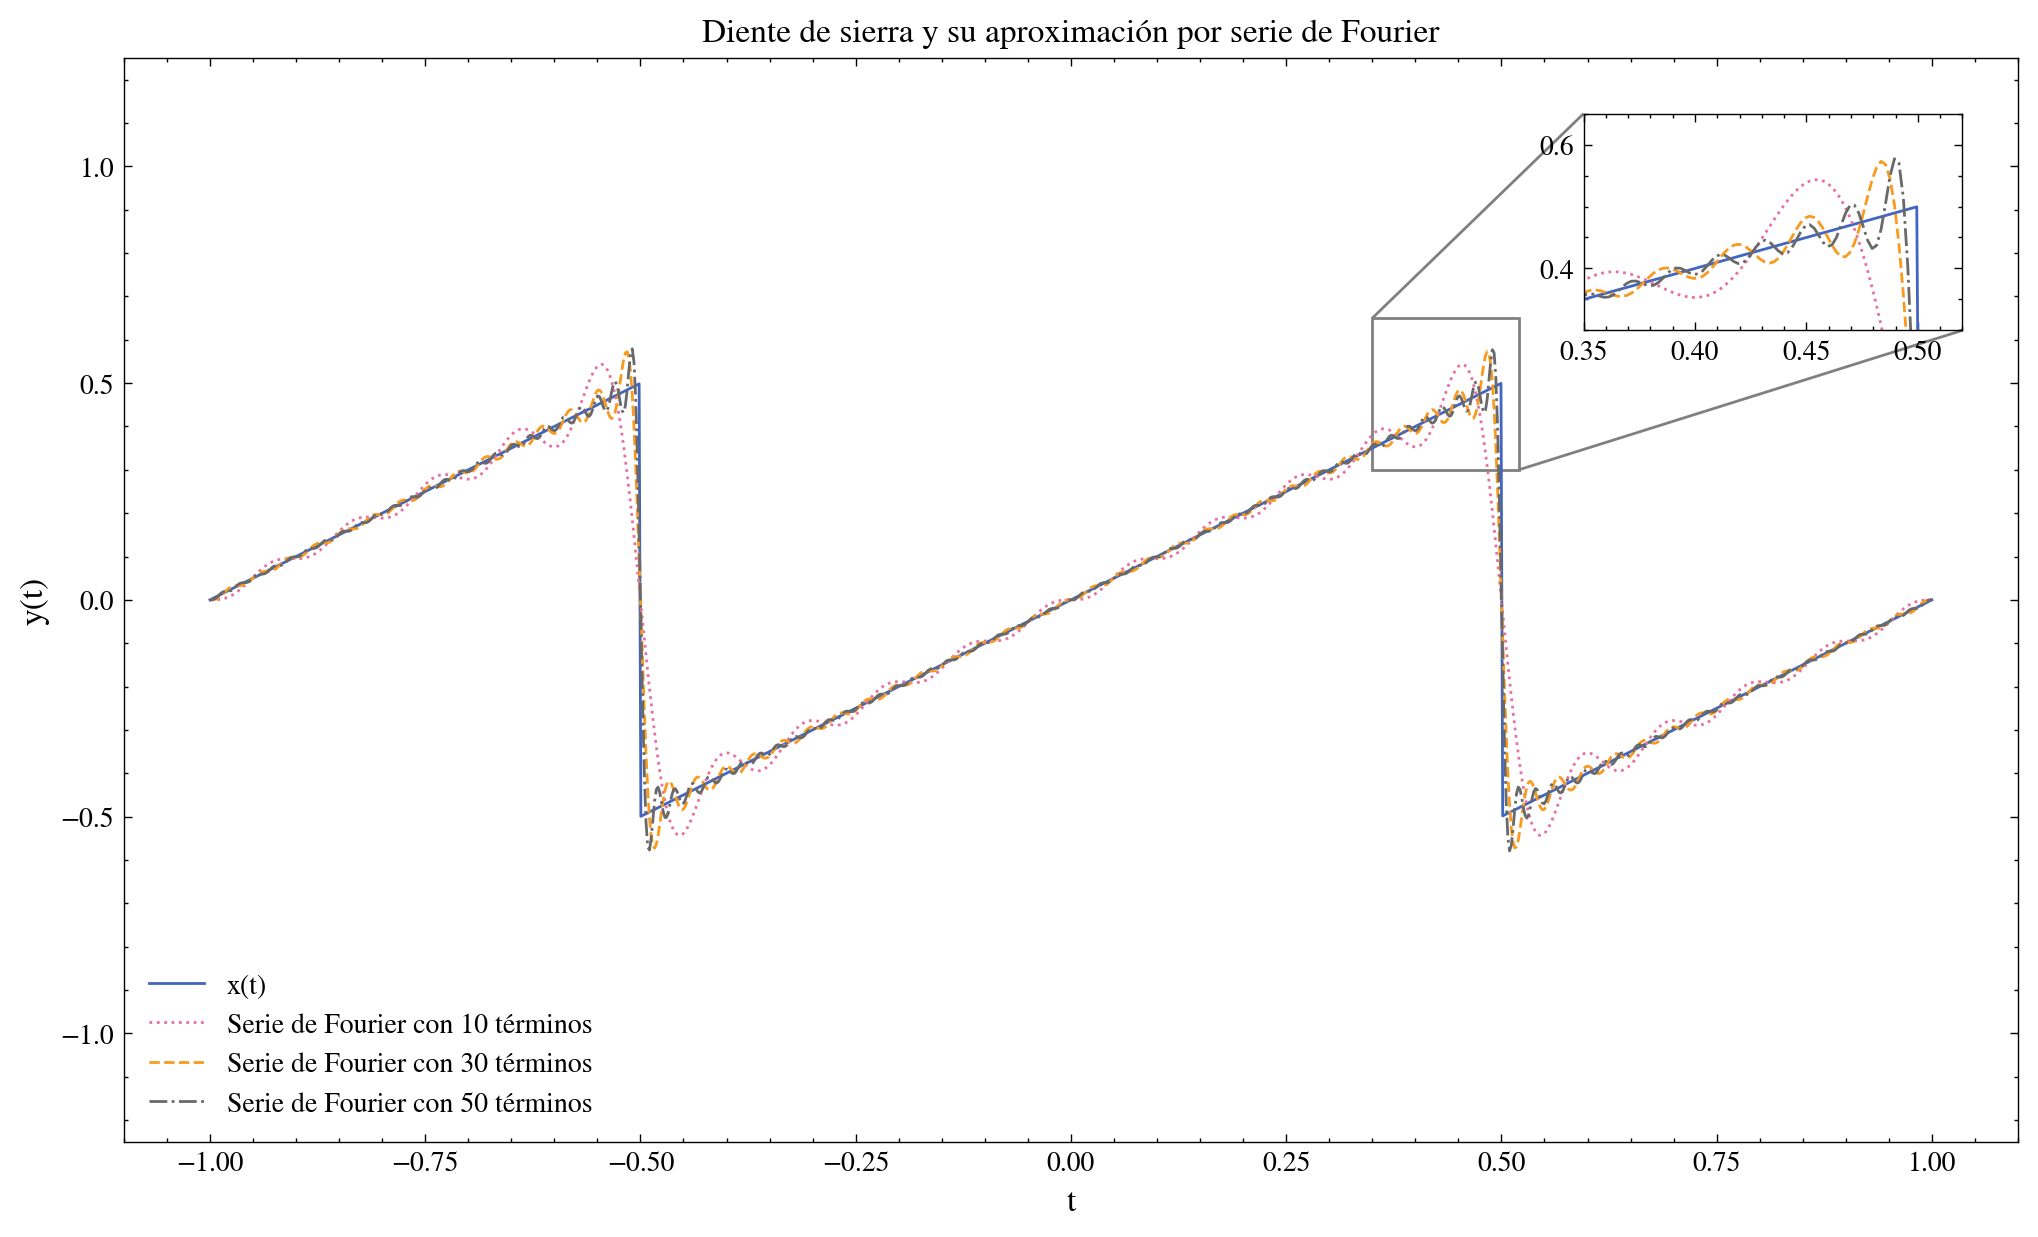

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot de la función de Diente de sierra y las aproximaciones
ax.plot(t, y(t), label='x(t)')
ax.plot(t, trigFourierSeries(an2, bn2, a02, T, 10)(t), label='Serie de Fourier con 10 términos')
ax.plot(t, trigFourierSeries(an2, bn2, a02, T, 30)(t), label='Serie de Fourier con 30 términos')
ax.plot(t, trigFourierSeries(an2, bn2, a02, T, 50)(t), label='Serie de Fourier con 50 términos')

ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.set_title('Diente de sierra y su aproximación por serie de Fourier')
ax.legend(loc='lower left')

original_xlim = ax.get_xlim()
original_ylim = ax.get_ylim()

ax.set_xlim(original_xlim)
ax.set_ylim((-1.25, 1.25))

axins = inset_axes(ax, width="20%", height="20%", loc='upper right', borderpad=2)
axins.plot(t, y(t))
axins.plot(t, trigFourierSeries(an2, bn2, a02, T, 10)(t))
axins.plot(t, trigFourierSeries(an2, bn2, a02, T, 30)(t))
axins.plot(t, trigFourierSeries(an2, bn2, a02, T, 50)(t))

axins.set_xlim(0.35, 0.52)
axins.set_ylim(0.3, 0.65)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

## *Serie de Fourier del Tren de Pulsos*

\begin{align*}
\\
&\text{Sea } x(t) = A \, \text{sgn}(\sin(2\pi ft)), \text{ con período } T = \frac{1}{f}.
\\\\
&\text{Se considera el intervalo } I=\left[-\frac{1}{2f}, \frac{1}{2f}\right] \text{ tal que }
\\\\
& \qquad A \, \text{sgn}(\sin(2\pi ft)) = 
\begin{cases}
-A & -\frac{1}{2f} \leq t < 0
\\\\
0  & t = 0
\\\\
A  & 0 < t \leq \frac{1}{2f}
\end{cases}
\\\\
&\text{A continuación, se calcula la expresión de los coeficientes $c_n$}
\\\\
&\text{de la forma exponencial de la serie de Fourier de $x(t)$.}
\\\\
\end{align*}


\begin{align*}
c_n &= \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} x(t) e^{-j\frac{2\pi}{T}nt} dt = \frac{1}{\frac{1}{f}} \int_{-\frac{1}{2f}}^{\frac{1}{2f}} x(t) e^{-j \frac{2\pi}{\frac{1}{f}}nt} dt
\\\\
&= f \int_{-\frac{1}{2f}}^{0} -A e^{-j2\pi fnt} dt + f \int_{0}^{0} 0 dt + f \int_{0}^{\frac{1}{2f}} A e^{-j2\pi fnt} dt
\\\\
&= Af \left(\int_{0}^{-\frac{1}{2f}} e^{-j2\pi fnt} dt + \int_{0}^{\frac{1}{2f}} e^{-j2\pi fnt} dt \right)
\\\\
&= Af \left(-\frac{e^{-j2\pi fnt}}{j 2\pi fn}\Bigg|_{0}^{-\frac{1}{2f}}  - \frac{e^{-j2\pi fnt}}{j 2\pi fn}\Bigg|_{0}^{\frac{1}{2f}}\right)
\\\\
&= Af \left(-\frac{e^{-j\pi n} -1}{j2\pi fn} - \frac{e^{-j\pi n } - 1}{j2\pi fn} \right)
\\\\ 
&= -\frac{A}{j \pi n} \left(\frac{e^{j\pi n} + e^{-j\pi n}}{2} -1 \right)
\\\\
&= j\frac{A}{\pi n} \left[\cos(\pi n) - 1 \right]
\\\\ 
&= -j\frac{A}{\pi n} \left[1 - \cos(\pi n) \right]
\\\\
\implies c_n &= -j \cdot \frac{A}{\pi n} \cdot \left[1 - (-1)^n \right]
\\\\
\end{align*}


\begin{align*}
\\\\
&\text{Por último, se derivan los coeficientes $a_n$ y $b_n$ de la forma}
\\\\
&\text{trigonométrica de la serie de Fourier a partir de $c_n$.}
\\\\
\end{align*}

\begin{align*}
a_n &= 2 \Re\left[c_n \right] = 2 \left[ 0 \right]
\\\\
\implies a_n &= 0
\\\\
b_n &= -2 \Im\left[c_n \right] = -2 \left[ -\frac{A}{\pi n} \cdot \left[1 - (-1)^n \right] \right]
\\\\
\implies b_n &= \frac{2A}{\pi n} \cdot \left[1 - (-1)^n \right]
\\\\
\end{align*}

-----

## *Serie de Fourier del Diente de sierra*

\begin{align*}
\\
&\text{Sea } x(t) = A \left(tf-\left\lfloor \frac{1}{2} + tf \right\rfloor \right), \text{ con período } T = \frac{1}{f}.
\\\\
&\text{Se considera el intervalo } I=\left[-\frac{1}{2f}, \frac{1}{2f}\right] \text{ tal que } \left\lfloor \frac{1}{2} + tf \right\rfloor = 0 \quad \forall t \in I.
\\\\
&\text{Luego, se tiene que la señal $x(t)$ restringida a $I$ es de la forma:}
\\\\
& \qquad x_I(t) = Atf.
\\\\
&\text{A continuación, se calcula la expresión de los coeficientes $c_n$}
\\\\
&\text{de la forma exponencial de la serie de Fourier de $x(t)$.}
\\\\
\end{align*}

\begin{align*}
c_n &= \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} x_I(t) e^{-j\frac{2\pi}{T}nt} \, dt= \frac{1}{\frac{1}{f}} \int_{-\frac{1}{2f}}^{\frac{1}{2f}} Atf e^{-j\frac{2\pi}{\frac{1}{f}}nt} \, dt
\\\\
&= f \int_{-\frac{1}{2f}}^{\frac{1}{2f}} Atf e^{-j2\pi fnt} \, dt = Af^2 \int_{-\frac{1}{2f}}^{\frac{1}{2f}} t e^{-j2\pi fnt} \, dt
\\\\
&= Af^2 \left[ \left(t \frac{e^{-j2\pi fnt}}{-j2\pi fn}\right) \Bigg|_{-\frac{1}{2f}}^{\frac{1}{2f}} - \int_{-\frac{1}{2f}}^{\frac{1}{2f}} e^{-j2\pi fnt}dt \right]
\\\\
&= Af^2 \left[\frac{1}{2f} \frac{e^{-j\pi n}}{-j2\pi nf} + \frac{1}{2f} \frac{e^{j\pi n}}{-j2\pi nf} + \left(\frac{e^{-j2\pi fnt}}{j2\pi nf}\right) \Bigg|_{-\frac{1}{2f}}^{\frac{1}{2f}} \right]
\\\\
&= Af^2 \left[-\frac{1}{2f} \left(\frac{e^{j\pi n}}{j2\pi nf} + \frac{e^{-j\pi n}}{j2\pi nf}\right) + \frac{e^{-j\pi n}}{j2\pi nf} - \frac{e^{j\pi n}}{j2\pi nf}\right]
\\\\
&= \frac{A}{\pi n} \left[-\frac{1}{2j} \left(\frac{e^{j\pi n} + e^{-j\pi n}}{2}\right) - f \left(\frac{e^{j\pi n}- e^{-j\pi n}}{2j}\right)\right]
\\\\
&= \frac{A}{\pi n} \left[-\frac{1}{2j} \cos(\pi n) - f \sin(\pi n) \right]
\\\\
&= \frac{A}{\pi n} \frac{j}{2} \cos(\pi n)
\\\\
\implies c_n &= j \cdot \frac{A}{2 \pi n} \cdot (-1)^n
\\\\
\end{align*}

\begin{align*}
&\text{Por último, se derivan los coeficientes $a_n$ y $b_n$ de la forma}
\\\\
&\text{trigonométrica de la serie de Fourier a partir de $c_n$.}
\\\\
\end{align*}

\begin{align*}
a_n &= 2 \Re\left[c_n \right] = 2 \left[ 0 \right]
\\\\
\implies a_n &= 0
\\\\
b_n &= -2 \Im\left[c_n \right] = -2 \left[ \frac{A}{2} \frac{\cos(\pi n)}{\pi n} \right]
\\\\
&= -A \cdot \frac{\cos(\pi n)}{\pi n}
\\\\
\implies b_n &= -\frac{A}{\pi n} \cdot(-1)^n
\\
\end{align*}

-------------------

## *Serie de Fourier de la Señal Triangular*

\begin{align*}
\\
&\text{Sea } x(t) = 4A\left|ft - \left\lfloor ft + \frac{1}{2} \right\rfloor \right| -A, \text{ con período } T = \frac{1}{f}.
\\\\
&\text{Se considera el intervalo } I=\left[-\frac{1}{2f}, \frac{1}{2f}\right] \text{ tal que }
\\\\
& \text{$x(t)$ restringida a $I$ es de la forma:}
\\\\
& \qquad x_I(t) = 
\begin{cases}
-A-4Aft, & -\frac{1}{2f} \leq t < 0 \\\\
-A+4Aft, & 0 \leq t \leq \frac{1}{2f} \\
\end{cases}
\\\\
&\text{A continuación, se calcula la expresión de los coeficientes $a_n$ y $b_n$}
\\\\
&\text{de la forma trigonométrica de la serie de Fourier de $x(t)$.}
\\\\
\\\\
&\text{Se observa que $x(t)$ es par con respecto al eje vertical, esto es,}
\\\\
& \qquad x(t) = x(-t) \, \forall t.
\\\\
& \text{ Por lo tanto, se anula $b_n$. }
\\\\
& \qquad \implies b_n = 0.
\\\\
&\text{Luego, solo queda calcular $a_n$.}
\\\\
\end{align*}

\begin{align*}
\\\\
a_n &= \frac{2}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} x_I(t)\cos(2\pi nft) dt
\\\\
&= 2f \left( \int_{-\frac{T}{2}}^{0} (-A-4Aft) \cos(2\pi nft) dt + \int_{0}^{\frac{T}{2}} (-A + 4Aft) \cos(2\pi nft) dt \right)
\\\\
\text{ (es par) } \rightarrow &= 2 \cdot 2f \int_{0}^{\frac{T}{2}} (-A+4Aft) \cos(2\pi nft) dt
\\\\
&= -4Af \int_{0}^{\frac{1}{2f}} \cos(2\pi nft) dt + 16Af^2 \int_{0}^{\frac{1}{2f}} t \cos(2\pi nft) dt
\\\\
\end{align*}

\begin{align*}
\\\\
\text{ $1.$ Resolvemos } & \quad -4Af \int_{0}^{\frac{1}{2f}} \cos(2\pi nft) dt
\\\\
&= -4Af \left(\frac{\sin(2\pi nft)}{2\pi nf}\Bigg|_{0}^{\frac{1}{2f}}\right)
\\\\
&= -\frac{2A}{n\pi} \sin(\pi n)
\\\\
&= 0
\\\\
\\\\
\text{ $2.$ Resolvemos } & \quad 16Af^2 \int_{0}^{\frac{1}{2f}} t \cos(2\pi nft) dt
\\\\
&= 16Af^2 \left( \left[\frac{t\sin(2\pi nft)}{2\pi nf}\Bigg|_{0}^{\frac{1}{2f}}\right] - \frac{1}
\\\\
{2\pi nf} \int_{0}^{\frac{1}{2f}} \sin(2\pi nft)dt \right)
\\\\
&= 16Af^2 \left[\frac{\sin(n\pi)}{4\pi nf^2} - \frac{1}{2\pi nf} \left(-\frac{\cos(2\pi nft)}{2\pi nf}\right)\Bigg|_{0}^{\frac{1}{2f}}\right]
\\\\
&= \frac{16Af^2}{4\pi^2 n^2 f^2} \left(\cos(n\pi) - 1 \right) = \frac{4A}{\pi^2 n^2} \left(\cos(n\pi) - 1 \right)
\\\\
\implies a_n &= \frac{4A}{\pi^2 n^2} \left[\left(-1 \right)^{n} - 1 \right]
\\\\
\end{align*}

In [61]:
# Señal triangular
z = lambda t: 4*A * np.abs((t * F - np.floor(0.5 + t * F))) - A

# Coeficientes de la señal triangular
a03 = 0
an3 = lambda n: (4*A)/(np.pi**2 * n**2) * ((-1)**n - 1)
bn3 = lambda n: 0

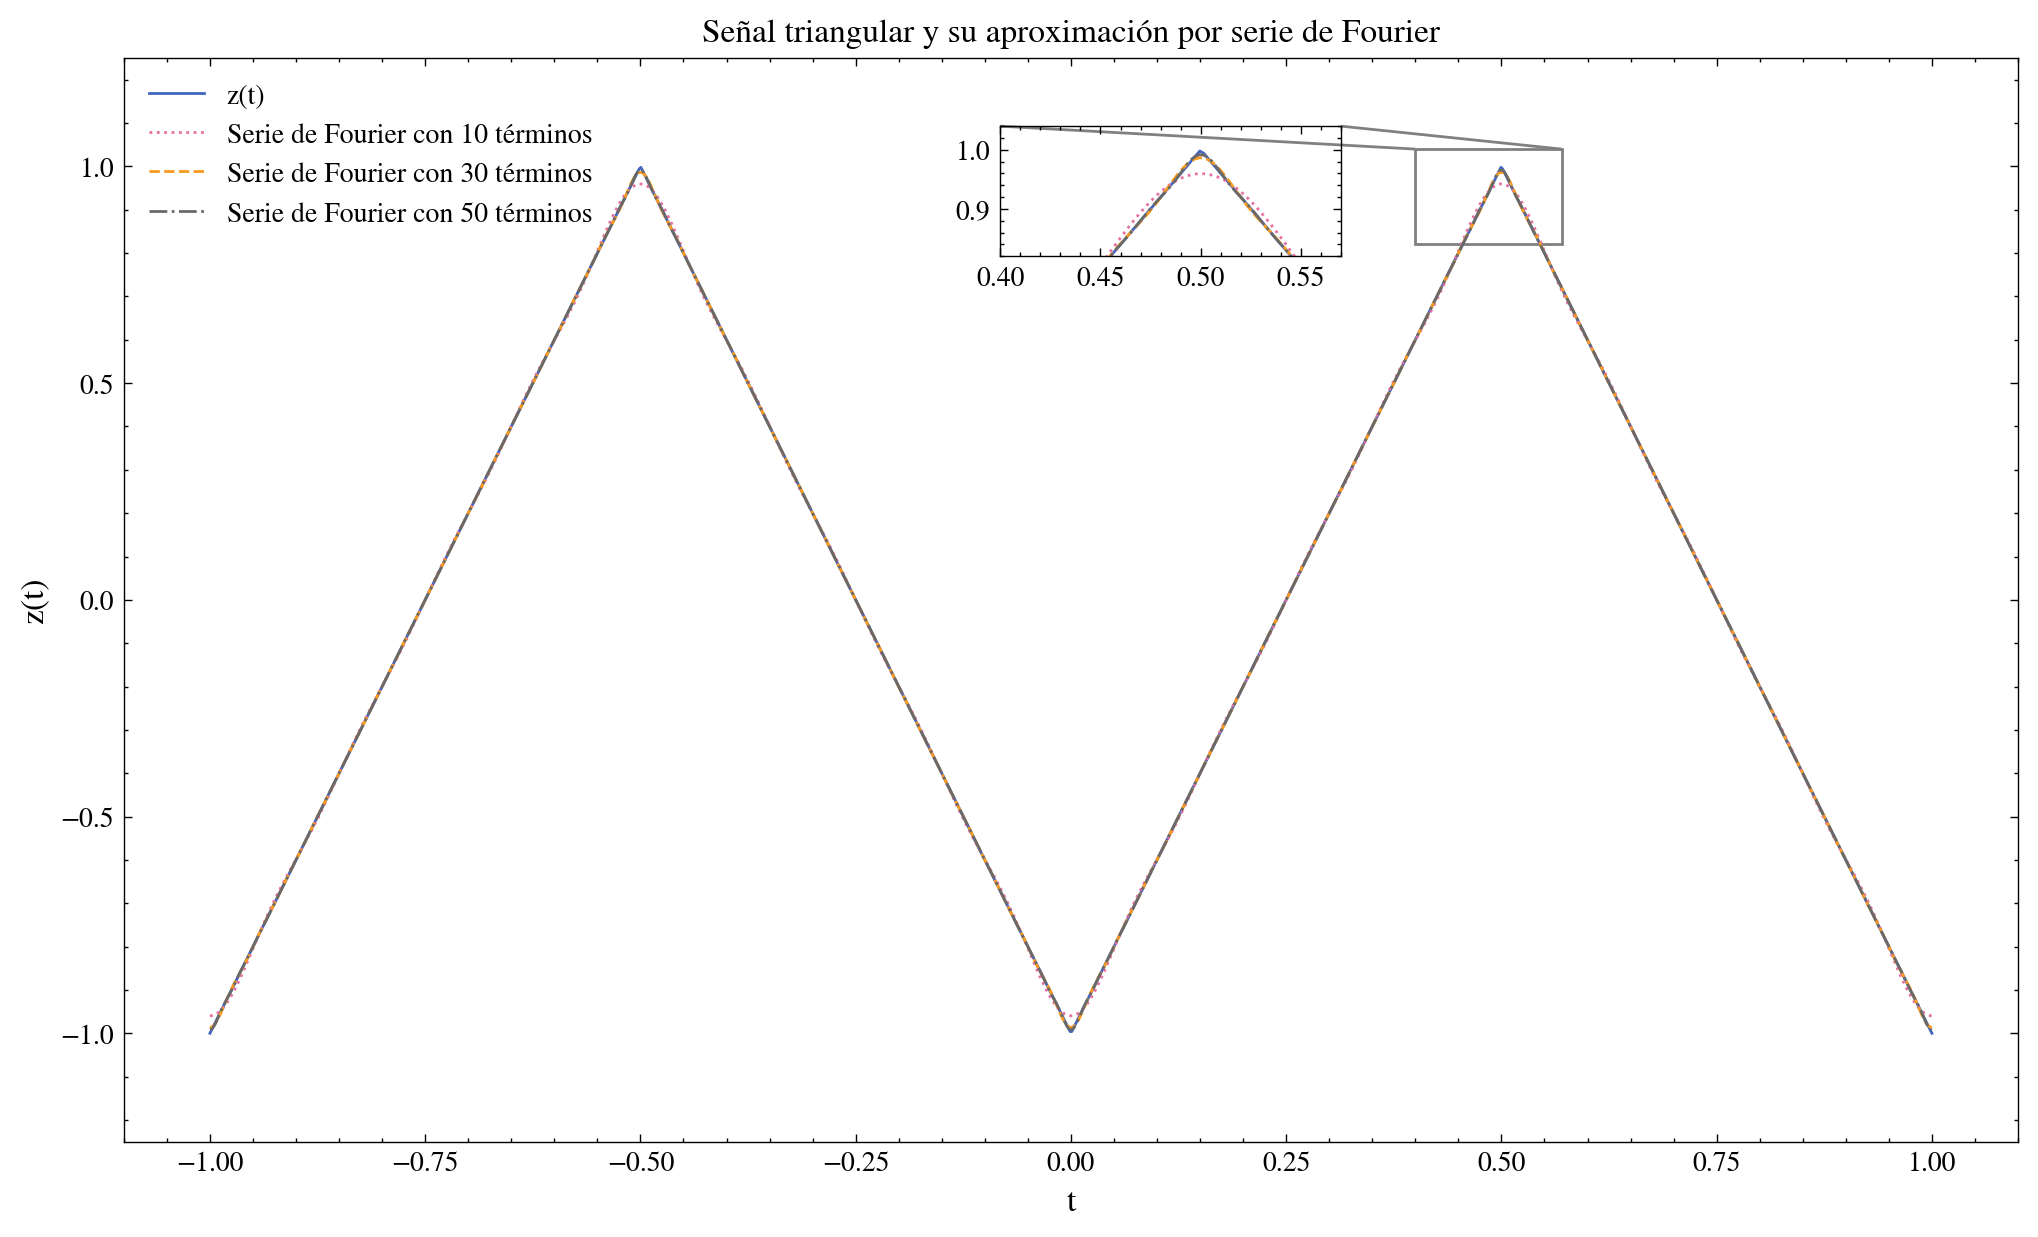

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot de la función de Diente de sierra y las aproximaciones
ax.plot(t, z(t), label='z(t)')
ax.plot(t, trigFourierSeries(an3, bn3, a03, T, 10)(t), label='Serie de Fourier con 10 términos')
ax.plot(t, trigFourierSeries(an3, bn3, a03, T, 30)(t), label='Serie de Fourier con 30 términos')
ax.plot(t, trigFourierSeries(an3, bn3, a03, T, 50)(t), label='Serie de Fourier con 50 términos')

ax.set_xlabel('t')
ax.set_ylabel('z(t)')
ax.set_title('Señal triangular y su aproximación por serie de Fourier')
ax.legend(loc='upper left')

original_xlim = ax.get_xlim()
original_ylim = ax.get_ylim()

ax.set_xlim(original_xlim)
ax.set_ylim((-1.25, 1.25))

axins = inset_axes(ax, width="30%", height="20%", bbox_to_anchor=(0.05, 0.35, 0.6, 0.6), bbox_transform=ax.transAxes)
axins.plot(t, z(t))
axins.plot(t, trigFourierSeries(an3, bn3, a03, T, 10)(t))
axins.plot(t, trigFourierSeries(an3, bn3, a03, T, 30)(t))
axins.plot(t, trigFourierSeries(an3, bn3, a03, T, 50)(t))

axins.set_xlim(0.40, 0.57)
axins.set_ylim(0.82, 1.04)

mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5")

plt.show()

Escriba una segunda función, que en este caso no reciba una cantidad de armónicos
como parámetro de entrada sino que utilice el error cuadrático medio entre la señal y
la aproximación como criterio de paro. Proponga un valor de error cuadrático medio,
gráfique la aproximación conseguida y reporte la cantidad de armónicos necesarios para
llegar a ese resultado. ¿Cuánto influye la parte cercana a la discontinuidad en comparación con tramos lejanos a la discontinuidad en la cuenta total del error cuadrático
medio? Justifı́quelo.